In [106]:
import pandas as pd
import sqlalchemy as db
import yaml
from sqlalchemy.sql import text
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [74]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)
# print(config)
engine = create_engine(config['olist'])

In [88]:
# df = pd.read_sql(
#     "select * from view_products_order_items;"
#     , engine)   ### this is for version 1 of sqlalchemy

sql = '''
    select * from view_products_order_items;
'''
with engine.connect() as conn:
    query = conn.execute(text(sql))         
    
df = pd.DataFrame(query.fetchall())
df

,order_id,seller_id,order_item_id,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,1,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,1,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,1,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,1,72a30483855e2eafc67aee5dc2560482,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,1,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [89]:
# load the Olist_product_dataset

df.isna().sum()
df.duplicated().sum()
df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   seller_id                   112650 non-null  object 
 2   order_item_id               112650 non-null  int64  
 3   product_id                  112650 non-null  object 
 4   product_category_name       112650 non-null  object 
 5   product_name_lenght         111047 non-null  float64
 6   product_description_lenght  111047 non-null  float64
 7   product_photos_qty          111047 non-null  float64
 8   product_weight_g            112632 non-null  float64
 9   product_length_cm           112632 non-null  float64
 10  product_height_cm           112632 non-null  float64
 11  product_width_cm            112632 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 10.3+ MB


,order_id,seller_id,order_item_id,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,1,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,1,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,1,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,1,72a30483855e2eafc67aee5dc2560482,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,1,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [90]:
# select the relevant features for analysis

selected_features = ['product_id', 'product_category_name', 'product_photos_qty',
                     'product_description_lenght', 'product_weight_g', 'product_length_cm',
                     'product_height_cm', 'product_width_cm']

df_selected = df[selected_features]

In [135]:
# calculate the purchase rate for each product

df_purchase = df.groupby('product_id').agg({'product_id': 'count', 'product_category_name': 'first'}).rename(
    columns={'product_id': 'purchases'}).reset_index()

df_purchase


,product_id,purchases,product_category_name
0,00066f42aeeb9f3007548bb9d3f33c38,1,perfumaria
1,00088930e925c41fd95ebfe695fd2655,1,automotivo
2,0009406fd7479715e4bef61dd91f2462,1,cama_mesa_banho
3,000b8f95fcb9e0096488278317764d19,2,utilidades_domesticas
4,000d9be29b5207b54e86aa1b1ac54872,1,relogios_presentes
...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2,cool_stuff
32947,fff81cc3158d2725c0655ab9ba0f712c,1,beleza_saude
32948,fff9553ac224cec9d15d49f5a263411f,1,fashion_bolsas_e_acessorios
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,informatica_acessorios


## Use SQL to recount the 'purchase' for each 'product id', the same principle

In [98]:
sql = '''
    select * from view_products_order_purchase;
'''
with engine.connect() as conn:
    query = conn.execute(text(sql))         
    
df2 = pd.DataFrame(query.fetchall())
df2


,product_id,purchase,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,027293c3b6d9e221268d9d6a5ffe5d0b,1,industria_comercio_e_negocios,57.0,148.0,1.0,30000.0,80.0,50.0,50.0
1,9ad4fb75641c9a71f995a06d0386a6f9,2,automotivo,59.0,840.0,1.0,4150.0,45.0,20.0,45.0
2,5ed2407e517ceac8615bb4d1ea238fe6,1,telefonia,50.0,375.0,1.0,150.0,19.0,4.0,11.0
3,8e630a6101b33d99671d79b67b87052d,2,casa_conforto,57.0,217.0,3.0,10900.0,50.0,30.0,40.0
4,cf41f723df264ec6f1c74d1caca1642e,1,beleza_saude,56.0,1668.0,1.0,3300.0,27.0,24.0,27.0
...,...,...,...,...,...,...,...,...,...,...
32946,4f27f0b527bb700ed8541270356a38f3,2,esporte_lazer,56.0,687.0,1.0,374.0,22.0,14.0,14.0
32947,c770c3d5ab511e88a96d387bdb0b6ce0,2,utilidades_domesticas,12.0,210.0,2.0,1100.0,48.0,24.0,23.0
32948,f663f7a6fc390011dd15492f14205573,1,beleza_saude,52.0,556.0,2.0,300.0,16.0,12.0,12.0
32949,df1ff6c9a263464ba1ea7cd3de5e8633,1,utilidades_domesticas,52.0,202.0,1.0,800.0,31.0,5.0,21.0


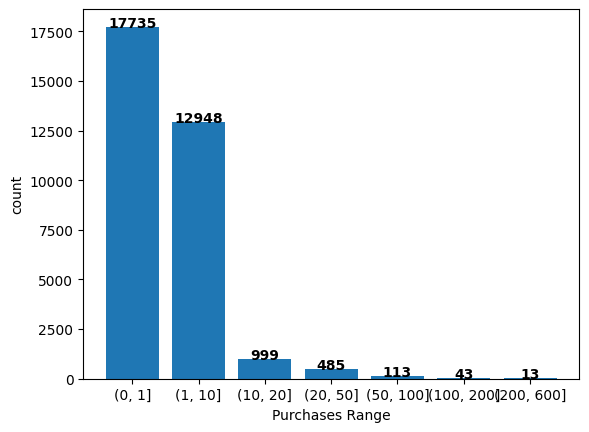

In [150]:
# define the bin ranges
bins = [0, 1, 10, 20, 50, 100, 200, 600]

# bin the purchases column and count the number of products in each bin
counts = pd.cut(df2['purchase'], bins=bins).value_counts(sort=False)

# plot the bar chart
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Purchases Range')
plt.ylabel('count')

# add the count number on each bar
for i, v in enumerate(counts.values):
    plt.text(i, v+5, str(v), ha='center', fontweight='bold')

plt.show()


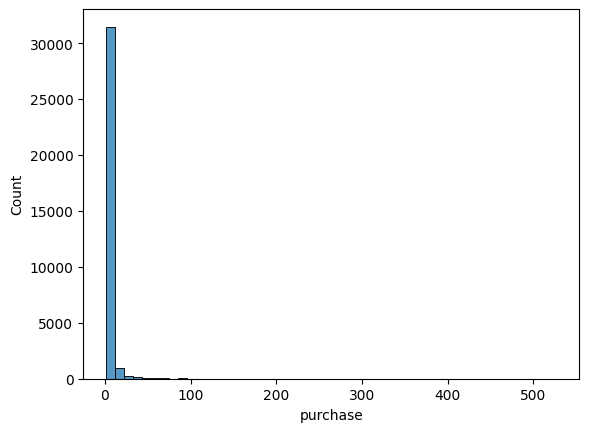

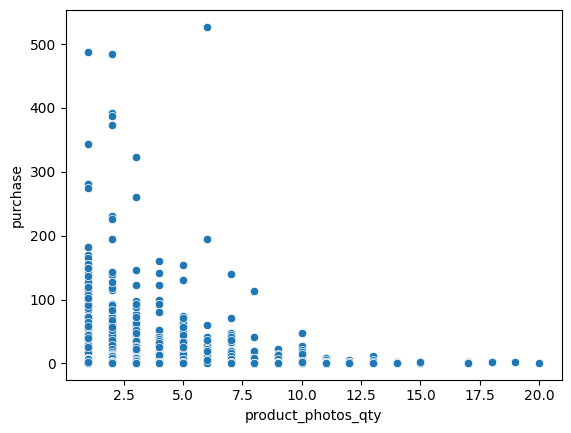

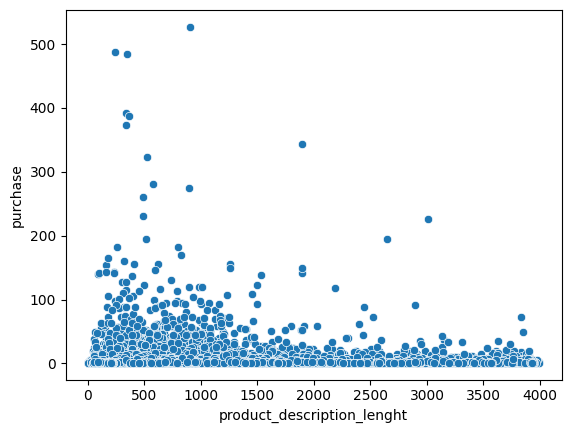

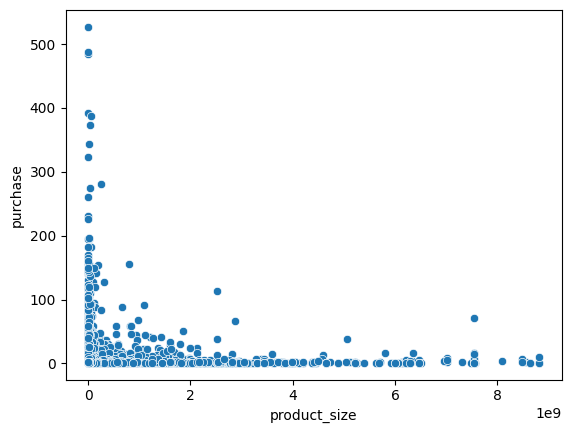

In [104]:
# plot the distribution of purchase 
sns.histplot(data=df2, x='purchase', bins=50)
plt.show()

# plot the relationship between photo quantity and purchase rate
sns.scatterplot(data=df2, x='product_photos_qty', y='purchase')
plt.show()

# plot the relationship between description length and purchase rate
sns.scatterplot(data=df2, x='product_description_lenght', y='purchase')
plt.show()

# plot the relationship between size (weight, length, height, width) and purchase rate
df2['product_size'] = df['product_weight_g'] * df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']
sns.scatterplot(data=df2, x='product_size', y='purchase')
plt.show()

In [206]:
# Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


In [207]:
X = df2[['product_photos_qty', 'product_description_lenght', 'product_weight_g', 'product_size']]
y = df2['purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
df2.isna().sum()

product_id                    0
purchase                      0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_size                  0
dtype: int64

In [209]:
df2 = df2.dropna()
df2

,product_id,purchase,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_size
0,027293c3b6d9e221268d9d6a5ffe5d0b,1,industria_comercio_e_negocios,57.0,148.0,1.0,30000.0,80.0,50.0,50.0,2.293200e+06
1,9ad4fb75641c9a71f995a06d0386a6f9,2,automotivo,59.0,840.0,1.0,4150.0,45.0,20.0,45.0,1.800000e+09
2,5ed2407e517ceac8615bb4d1ea238fe6,1,telefonia,50.0,375.0,1.0,150.0,19.0,4.0,11.0,4.317885e+07
3,8e630a6101b33d99671d79b67b87052d,2,casa_conforto,57.0,217.0,3.0,10900.0,50.0,30.0,40.0,4.800000e+05
4,cf41f723df264ec6f1c74d1caca1642e,1,beleza_saude,56.0,1668.0,1.0,3300.0,27.0,24.0,27.0,1.575000e+08
...,...,...,...,...,...,...,...,...,...,...,...
32946,4f27f0b527bb700ed8541270356a38f3,2,esporte_lazer,56.0,687.0,1.0,374.0,22.0,14.0,14.0,4.756000e+05
32947,c770c3d5ab511e88a96d387bdb0b6ce0,2,utilidades_domesticas,12.0,210.0,2.0,1100.0,48.0,24.0,23.0,2.581740e+06
32948,f663f7a6fc390011dd15492f14205573,1,beleza_saude,52.0,556.0,2.0,300.0,16.0,12.0,12.0,8.682188e+08
32949,df1ff6c9a263464ba1ea7cd3de5e8633,1,utilidades_domesticas,52.0,202.0,1.0,800.0,31.0,5.0,21.0,1.500000e+07


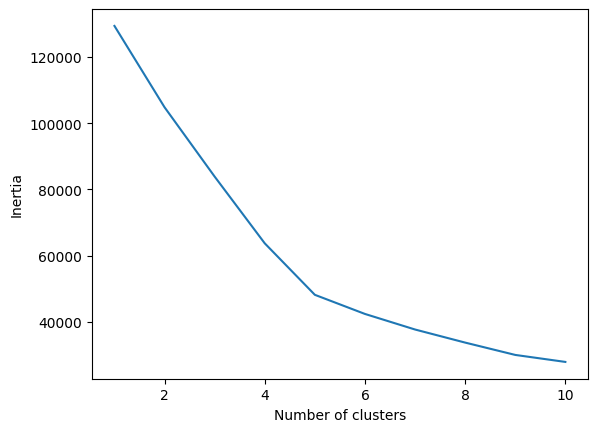

In [159]:
# Normalize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


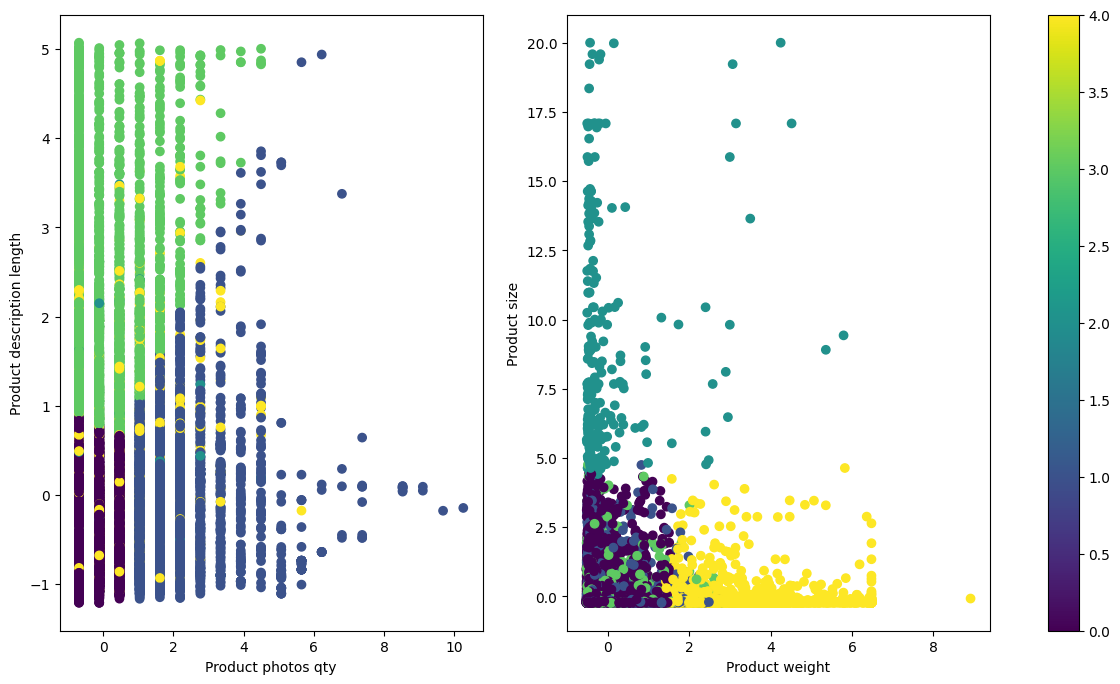

In [242]:
# Apply k-means clustering with the optimal number of clusters k =5

kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X_scaled)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

scatter0 = ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_)
ax[0].set_xlabel('Product photos qty')
ax[0].set_ylabel('Product description length')

scatter1 = ax[1].scatter(X_scaled[:, 2], X_scaled[:, 3], c=kmeans.labels_)
ax[1].set_xlabel('Product weight')
ax[1].set_ylabel('Product size')

# Add color bar
fig.colorbar(scatter1, ax=ax, )
# cbar = fig.colorbar(scatter1, ax=ax, ticks=range(5))

plt.show()


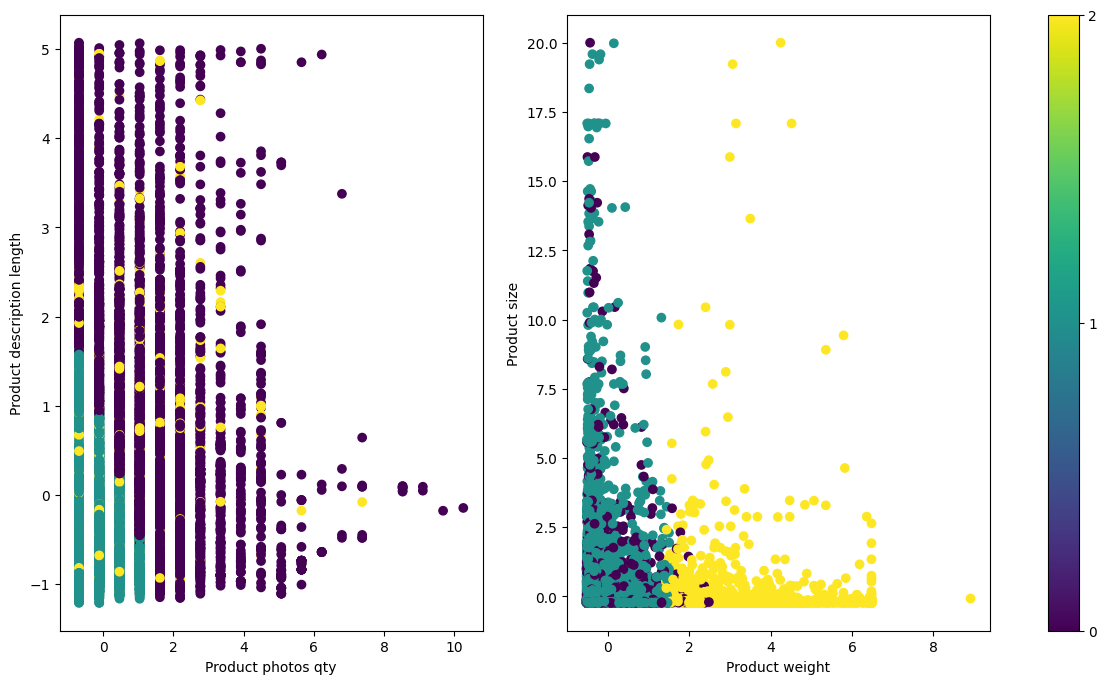

In [241]:
# Apply k-means clustering k =3

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_scaled)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

scatter0 = ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_)
ax[0].set_xlabel('Product photos qty')
ax[0].set_ylabel('Product description length')

scatter1 = ax[1].scatter(X_scaled[:, 2], X_scaled[:, 3], c=kmeans.labels_)
ax[1].set_xlabel('Product weight')
ax[1].set_ylabel('Product size')

# Add color bar

# fig.colorbar(scatter1, ax=ax)
cbar = fig.colorbar(scatter1, ax=ax, ticks=range(3))

plt.show()


## Silhouette scores 
#### Silhouette scores are a metric used to evaluate the quality of clustering results. The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher scores indicating that objects are well-matched to their own cluster and poorly-matched to neighboring clusters.

In [190]:
import numpy as np
import plotly.graph_objs as go
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.io as pio

In [195]:
# k=5  calculate the silhouette 

kmeans = KMeans(n_clusters=5, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# calculate the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, cluster_labels)

# create a Silhouette plot using Plotly
trace = go.Scatter(
    y=np.arange(len(X)),
    x=silhouette_vals,
    mode='markers',
    marker=dict(
        color=cluster_labels,
        colorscale='Viridis',
        size=10,
    ),
    text=cluster_labels
)

layout = go.Layout(
    title='Silhouette Plot',
    xaxis=dict(
        title='Silhouette Coefficient',
        range=[-1, 1]
    ),
    yaxis=dict(
        title='Cluster Labels'
    )
)

fig = go.Figure(data=[trace], layout=layout)

pio.write_html(fig, file='plot.html', auto_open=True)
# fig.show()

In [204]:
cluster_labels.size

100

In [193]:
# k=3  calculate the silhouette 

kmeans = KMeans(n_clusters=3, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# calculate the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, cluster_labels)

# create a Silhouette plot using Plotly
trace = go.Scatter(
    y=np.arange(len(X)),
    x=silhouette_vals,
    mode='markers',
    marker=dict(
        color=cluster_labels,
        colorscale='Viridis',
        size=10,
    ),
    text=cluster_labels
)

layout = go.Layout(
    title='Silhouette Plot',
    xaxis=dict(
        title='Silhouette Coefficient',
        range=[-1, 1]
    ),
    yaxis=dict(
        title='Cluster Labels'
    )
)

fig = go.Figure(data=[trace], layout=layout)

pio.write_html(fig, file='plot.html', auto_open=True)
# fig.show()

In [211]:
# Add the cluster labels to the original dataframe
df2['cluster'] = kmeans.labels_

# Calculate the proportion of purchases in each cluster
purchase_prop = df2.groupby('cluster')['purchase'].mean()

print(purchase_prop)

cluster
0    3.437752
1    3.614996
2    3.680934
3    3.417258
4    2.968000
Name: purchase, dtype: float64


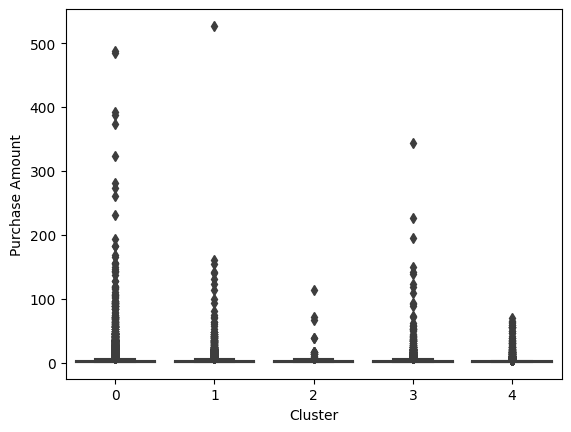

In [239]:
import seaborn as sns

# Create a boxplot
sns.boxplot(x="cluster", y="purchase", data=df2)

plt.xlabel('Cluster')
plt.ylabel('Purchase Amount')

plt.show()


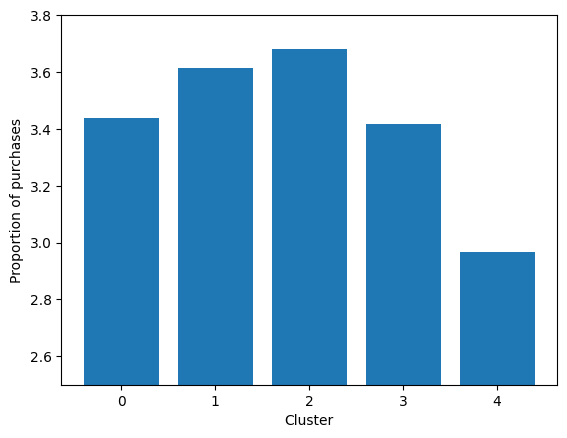

In [236]:

# Calculate the proportion of purchases in each cluster
purchase_prop = df2.groupby('cluster')['purchase'].mean()
# purchase_std = df2.groupby('cluster')['purchase'].std()

# Create a bar plot
plt.bar(purchase_prop.index, purchase_prop.values) #yerr=purchase_std.values)
plt.xlabel('Cluster')
plt.ylabel('Proportion of purchases')
plt.ylim(2.5, 3.8)

plt.show()
